<a href="https://colab.research.google.com/github/soumo99/DL_Codes/blob/main/CNN_Implementation_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist

Loading the dataset

In [28]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [29]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [30]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Plotting the first image of the dataset

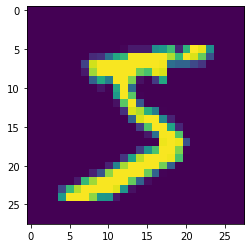

In [32]:
plt.imshow(X_train[0])

In [33]:
X_train[0].shape

(28, 28)

 By default, the shape of every image in the mnist dataset is 28 x 28, so we will not need to check the shape of all the images.

Data Preprocessing

In [34]:
#Reshaping the data 
#(no. of images, shape of image , 1 indicates grayscale )
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [35]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Building the model

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten

model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape = (28,28,1))) #kernel size = 3 means 3x3 filter matrix
model.add(Conv2D(32 , kernel_size = 3,activation = 'relu'))
model.add(Flatten()) # serves as a connection between Conv layer and Dense layer 
model.add(Dense(10,activation = 'softmax')) 

Compiling the model -  Compiling the model takes three parameters: optimizer, loss and metrics.

In [37]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


Training the model

In [38]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2494 - accuracy: 0.9474 - val_loss: 0.0896 - val_accuracy: 0.9732
Epoch 2/3
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0744 - accuracy: 0.9777 - val_loss: 0.0974 - val_accuracy: 0.9701
Epoch 3/3
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.0930 - val_accuracy: 0.9766


Using the model for prediction *italicised text*

In [39]:
#Predicting the first 4 images in the test set
model.predict(X_test[:4])

array([[1.71071175e-08, 1.67621277e-12, 1.15503758e-08, 5.14325529e-06,
        7.03797033e-14, 1.86460092e-12, 2.32224670e-16, 9.99994874e-01,
        1.92508853e-09, 3.43335360e-09],
       [5.78516790e-08, 3.06869806e-05, 9.99951363e-01, 9.47907779e-08,
        1.60879907e-07, 8.06705744e-11, 1.01845235e-05, 8.55205555e-13,
        7.49594437e-06, 2.68262561e-12],
       [8.33625968e-09, 9.99937415e-01, 4.60559050e-07, 2.58037129e-08,
        2.65281651e-05, 5.72920333e-09, 1.48435461e-07, 2.41174320e-07,
        3.51871058e-05, 1.55068833e-10],
       [9.99974489e-01, 1.51969735e-12, 2.51415931e-05, 4.62512103e-12,
        8.11827121e-08, 3.08742025e-11, 1.49227887e-07, 7.53432802e-11,
        1.61631579e-08, 5.53621113e-08]], dtype=float32)

Actual result

In [40]:
Y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Observation : The actual results show that the first four images are also 7, 2,1 and 0. The  model predicted correctly